# 01: Exploratory Data Analysis (EDA)
Project Statistika Inferensi TIF-SI-B 2024 Kelompok 8.

Anggota:
1. Ahmad Zaki (225150201111025)
2. Arion Syemael Siahaan (225150207111060)
3. Rayhan Egar Sadtya Nugraha (225150201111014)

## Data Read

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import kstest, shapiro, anderson

In [5]:
df = pd.read_csv('../data/SI-B Dataset 3 Project v2.csv')
df.head()

,contrast-1-0,correlation-1-0,dissimilarity-1-0,contrast-1-45,correlation-1-45,dissimilarity-1-45,contrast-1-90,correlation-1-90,dissimilarity-1-90,contrast-1-135,correlation-1-135,dissimilarity-1-135,Class
0,10.541252,0.997390,1.246816,24.404711,0.993967,1.733760,20.763117,0.994862,1.442313,25.495182,0.993697,1.723876,1
1,9.659018,0.997369,1.163762,22.457277,0.993891,1.654415,15.695636,0.995726,1.323746,19.458658,0.994707,1.618708,1
2,8.915220,0.997405,1.070119,17.622592,0.994877,1.412638,13.601010,0.996042,1.107091,19.837377,0.994233,1.425450,1
3,8.609025,0.997328,1.044536,17.402866,0.994606,1.390991,12.071361,0.996255,1.050541,17.983701,0.994426,1.375565,1
4,6.703944,0.997493,0.935786,13.865566,0.994822,1.260165,9.653975,0.996391,0.977596,13.670599,0.994895,1.252951,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656 entries, 0 to 5655
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   contrast-1-0         5656 non-null   float64
 1   correlation-1-0      5656 non-null   float64
 2   dissimilarity-1-0    5656 non-null   float64
 3   contrast-1-45        5656 non-null   float64
 4   correlation-1-45     5656 non-null   float64
 5   dissimilarity-1-45   5656 non-null   float64
 6   contrast-1-90        5656 non-null   float64
 7   correlation-1-90     5656 non-null   float64
 8   dissimilarity-1-90   5656 non-null   float64
 9   contrast-1-135       5656 non-null   float64
 10  correlation-1-135    5656 non-null   float64
 11  dissimilarity-1-135  5656 non-null   float64
 12  Class                5656 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 574.6 KB


In [7]:
numeric_feats = df.select_dtypes(include=['float64', 'int64'])
numeric_feats.drop(columns=['Class'], inplace=True)
numeric_feats

,contrast-1-0,correlation-1-0,dissimilarity-1-0,contrast-1-45,correlation-1-45,dissimilarity-1-45,contrast-1-90,correlation-1-90,dissimilarity-1-90,contrast-1-135,correlation-1-135,dissimilarity-1-135
0,10.541252,0.997390,1.246816,24.404711,0.993967,1.733760,20.763117,0.994862,1.442313,25.495182,0.993697,1.723876
1,9.659018,0.997369,1.163762,22.457277,0.993891,1.654415,15.695636,0.995726,1.323746,19.458658,0.994707,1.618708
2,8.915220,0.997405,1.070119,17.622592,0.994877,1.412638,13.601010,0.996042,1.107091,19.837377,0.994233,1.425450
3,8.609025,0.997328,1.044536,17.402866,0.994606,1.390991,12.071361,0.996255,1.050541,17.983701,0.994426,1.375565
4,6.703944,0.997493,0.935786,13.865566,0.994822,1.260165,9.653975,0.996391,0.977596,13.670599,0.994895,1.252951
...,...,...,...,...,...,...,...,...,...,...,...,...
5651,2.283368,0.998709,0.658993,6.856117,0.996131,0.953928,5.543817,0.996868,0.725780,7.150027,0.995965,0.936422
5652,1.936424,0.999447,0.560383,5.696179,0.998375,0.880252,4.403784,0.998743,0.689985,6.195821,0.998233,0.839363
5653,3.502293,0.998636,0.786265,8.228432,0.996799,1.063427,6.107625,0.997622,0.810050,8.340865,0.996755,1.070910
5654,2.693193,0.998411,0.838619,8.313214,0.995103,1.167344,7.228527,0.995737,0.917355,8.882472,0.994767,1.164045


In [8]:
df_target = df['Class'].copy()
df_data = df.drop(columns=['Class', 'correlation-1-0'], axis=1).copy()

In [9]:
df_data.shape

(5656, 11)

## Train test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, test_size=.2, random_state=42)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [12]:
# Check shape consistency of train and test features

shape_consistency = 1 if X_train.shape[1] == X_test.shape[1] else 0


In [15]:
summary = {

    "Train Shape": X_train.shape,

    "Test Shape": X_test.shape,

    "Consistency": shape_consistency,

    "Features": X_train.columns.tolist()

}
summary

{'Train Shape': (4524, 11),
 'Test Shape': (1132, 11),
 'Consistency': 1,
 'Features': ['contrast-1-0',
  'dissimilarity-1-0',
  'contrast-1-45',
  'correlation-1-45',
  'dissimilarity-1-45',
  'contrast-1-90',
  'correlation-1-90',
  'dissimilarity-1-90',
  'contrast-1-135',
  'correlation-1-135',
  'dissimilarity-1-135']}

### Note
- Untuk data training dan target training, masing-masing menggunakan: X_train dan y_train
- Untuk data testing dan target testing, masing-masing menggunakan: X_test dan y_test
- Identifier untuk training dan testing, masing-masing menggunakan: id_train dan id_test

## Data Distribution

### Target Variable

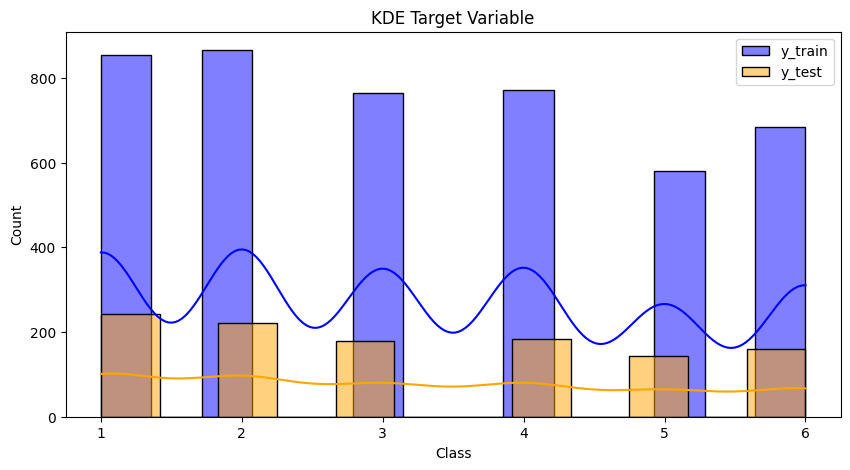

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(y_train, x='Class', label='y_train', kde=True, color='blue', alpha=0.5) 
sns.histplot(y_test, x='Class', label='y_test', kde=True, color='orange', alpha=0.5) 

plt.title('KDE Target Variable')
plt.legend()
plt.show()

Grafik di atas menunjukkan distribusi variabel target berdasarkan kelas untuk data latih (y_train) dan data uji (y_test). Histogram yang tumpang tindih dilengkapi dengan kurva KDE (Kernel Density Estimate) untuk memperlihatkan distribusi yang lebih halus pada masing-masing subset data. Data latih digambarkan dengan warna biru, sementara data uji digambarkan dengan warna oranye. 

Terlihat bahwa distribusi kelas pada data latih dan data uji cukup konsisten, menunjukkan bahwa proses pembagian data tidak menghasilkan bias yang signifikan antara kedua subset ini. Hal ini penting untuk memastikan bahwa model yang akan dilatih tidak akan mendapatkan preferensi berlebih pada salah satu kelas, sehingga evaluasi performa pada data uji dapat mencerminkan generalisasi model dengan lebih baik.


### Feature Variable

In [18]:
print(1 if X_train.shape[1]==X_test.shape[1] else 0)

1


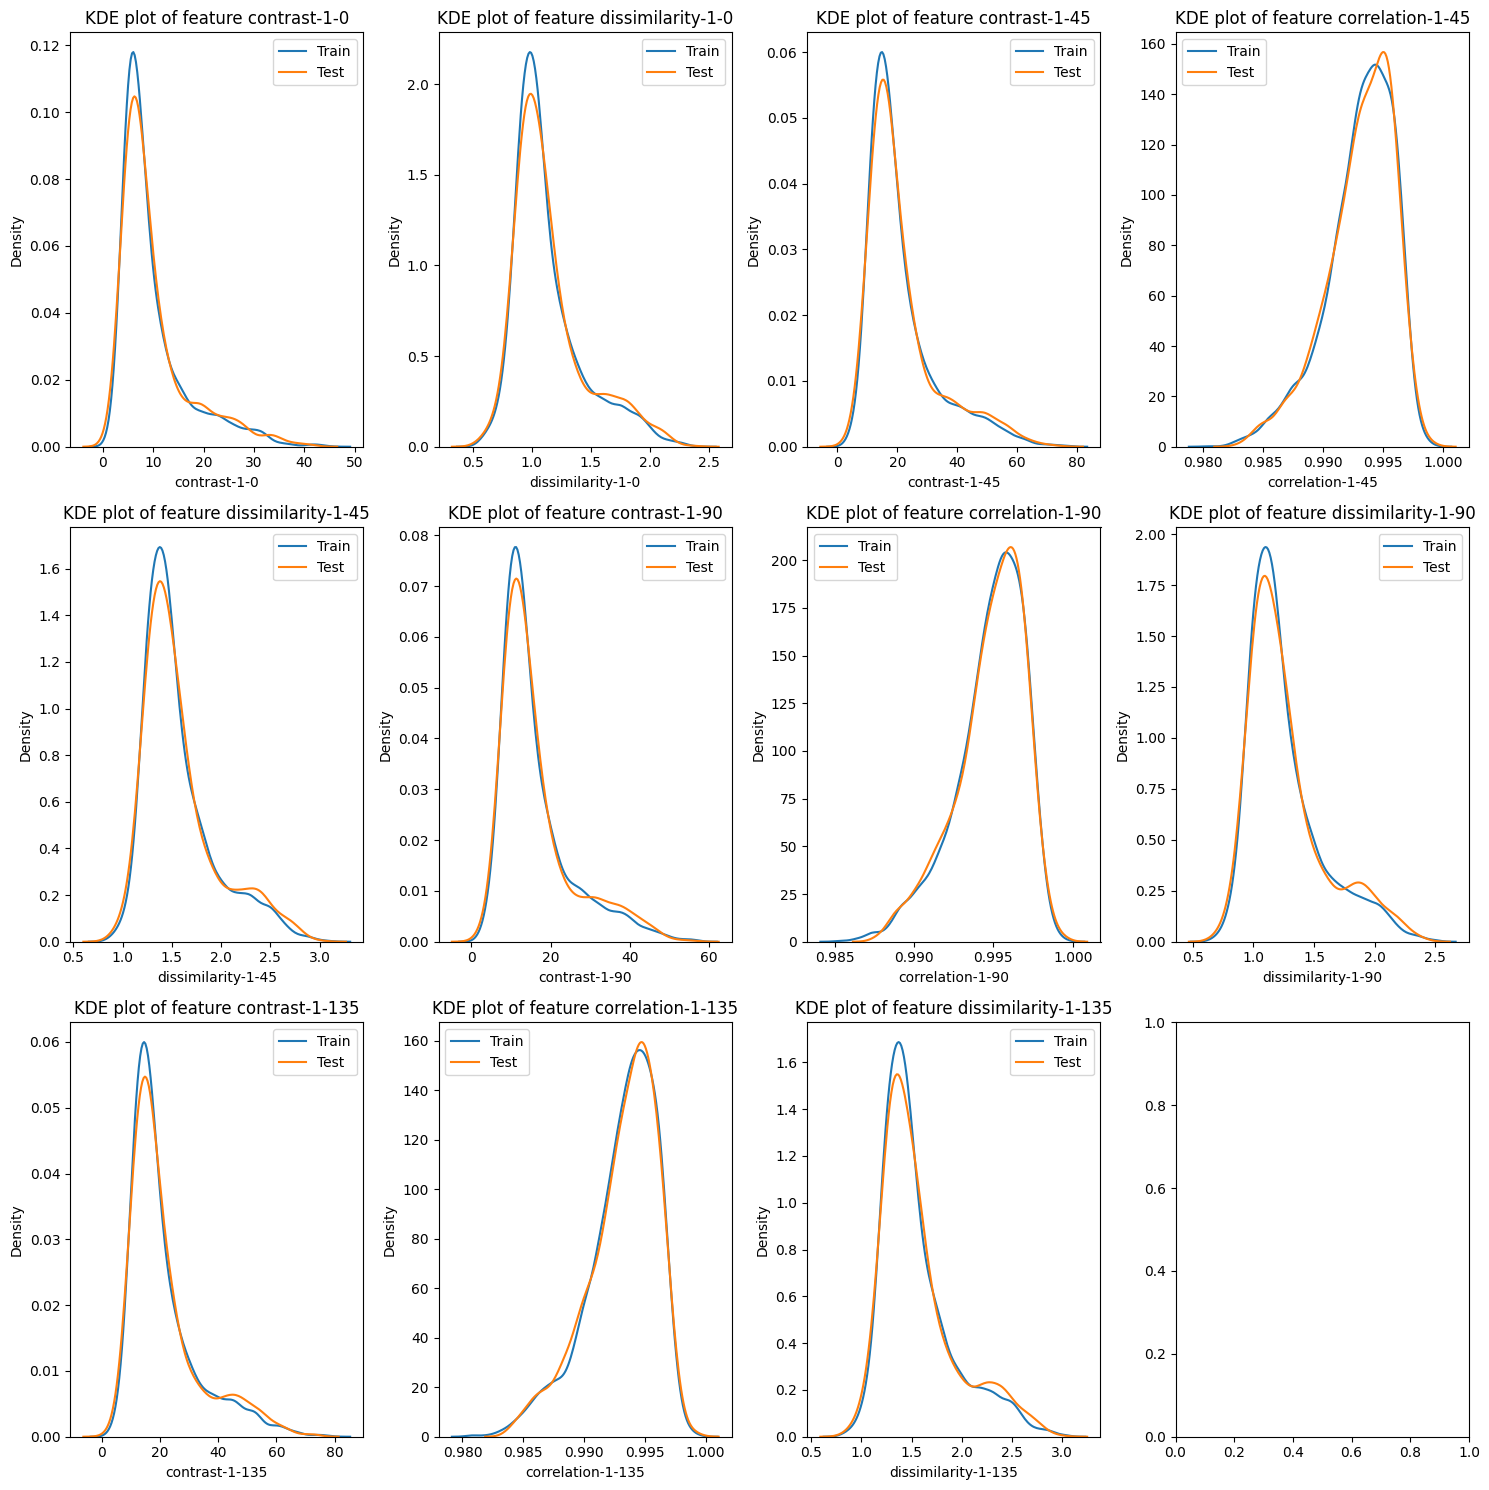

In [19]:
num_cols = 4
num_rows = len(X_train.columns) // num_cols + (len(X_train.columns) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, feature in enumerate(X_train.columns):
    sns.kdeplot(X_train[feature], label='Train', ax=axes[i])
    sns.kdeplot(X_test[feature], label='Test', ax=axes[i])
    axes[i].set_title(f'KDE plot of feature {feature}')
    axes[i].legend()

plt.tight_layout()
plt.show()

Grafik di atas menampilkan distribusi variabel fitur dalam dataset, baik untuk data latih (X_train) maupun data uji (X_test), yang digambarkan dengan kurva KDE (Kernel Density Estimate). Setiap subplot merepresentasikan distribusi satu fitur, dengan kurva oranye untuk data uji dan kurva biru untuk data latih. Melalui visualisasi ini, dapat dilihat bahwa sebagian besar fitur memiliki distribusi yang serupa antara data latih dan data uji, yang mengindikasikan bahwa proses pemisahan data tidak menyebabkan perubahan besar dalam karakteristik fitur antar subset. Hal ini penting untuk memastikan bahwa distribusi pada data latih tetap representatif terhadap data uji, sehingga model yang dilatih dapat memiliki performa yang baik pada data yang belum pernah dilihat.

## Data Normality

### Assess Skewness and Kurtosis

In [20]:
from scipy.stats import skew, kurtosis

skew_kurtosis_results = {
    'Feature': [],
    'Skew': [],
    'Kurtosis': []
}

for feature in X_train.columns:
    skew_value = skew(X_train[feature])
    kurtosis_value = kurtosis(X_train[feature])

    skew_kurtosis_results['Feature'].append(feature)
    skew_kurtosis_results['Skew'].append(skew_value)
    skew_kurtosis_results['Kurtosis'].append(kurtosis_value)

skew_kurtosis_df = pd.DataFrame(skew_kurtosis_results)
skew_kurtosis_df

,Feature,Skew,Kurtosis
0,contrast-1-0,1.858047,3.501593
1,dissimilarity-1-0,1.323059,1.555066
2,contrast-1-45,1.623713,2.559898
3,correlation-1-45,-0.915316,0.767769
4,dissimilarity-1-45,1.305511,1.431465
5,contrast-1-90,1.597828,2.441007
6,correlation-1-90,-0.924536,0.790158
7,dissimilarity-1-90,1.279560,1.357643
8,contrast-1-135,1.651513,2.656153
9,correlation-1-135,-0.960483,0.825887


In [21]:
skew_kurtosis_df['Skew'].describe()

count    11.000000
mean      0.830716
std       1.147733
min      -0.960483
25%       0.182122
50%       1.305511
75%       1.610770
max       1.858047
Name: Skew, dtype: float64

In [22]:
skew_kurtosis_df['Kurtosis'].describe()

count    11.000000
mean      1.757764
std       0.902561
min       0.767769
25%       1.091765
50%       1.448763
75%       2.500452
max       3.501593
Name: Kurtosis, dtype: float64

1. Skewness: Skewness menunjukkan simetri distribusi data. Nilai rata-rata skewness adalah sekitar 1.11, yang menunjukkan bahwa mayoritas fitur memiliki distribusi yang sedikit miring. Nilai skewness berkisar dari -4.04 (negatif, miring ke kiri) hingga 46.50 (positif, miring ke kanan). Sebagian besar fitur memiliki skewness di sekitar nol, yang mengindikasikan distribusi simetris, meskipun ada beberapa outlier dengan skewness tinggi.

2. Kurtosis: Kurtosis mengukur puncak atau kelancipan distribusi. Rata-rata kurtosis adalah sekitar 38.11, namun standar deviasi yang sangat tinggi (265.48) menunjukkan adanya variasi besar antar fitur. Nilai kurtosis berkisar dari -0.62 (distribusi lebih datar dari normal) hingga 2320.61 (distribusi sangat berpuncak). Ini mengindikasikan bahwa beberapa fitur memiliki distribusi yang sangat berpuncak atau lebih flat dari distribusi normal.

### Saphiro-Wilk test

In [24]:
from scipy.stats import shapiro
import pandas as pd

shapiro_test_results = {
    'Feature': [],
    'Statistic': [],
    'P-Value': [],
    'Normality': []
}

alpha = 0.05

for feature in X_train.columns:

    statistic, p_value = shapiro(X_train[feature])

    shapiro_test_results['Feature'].append(feature)
    shapiro_test_results['Statistic'].append(statistic)
    shapiro_test_results['P-Value'].append(p_value)

    if p_value < alpha:
        shapiro_test_results['Normality'].append('Not Normal')
    else:
        shapiro_test_results['Normality'].append('Potentially Normal')

shapiro_test_df = pd.DataFrame(shapiro_test_results)
shapiro_test_df

,Feature,Statistic,P-Value,Normality
0,contrast-1-0,0.795462,0.000000e+00,Not Normal
1,dissimilarity-1-0,0.885158,0.000000e+00,Not Normal
2,contrast-1-45,0.839383,0.000000e+00,Not Normal
3,correlation-1-45,0.947846,2.392457e-37,Not Normal
4,dissimilarity-1-45,0.886323,0.000000e+00,Not Normal
5,contrast-1-90,0.842607,0.000000e+00,Not Normal
6,correlation-1-90,0.947374,1.768625e-37,Not Normal
7,dissimilarity-1-90,0.890765,0.000000e+00,Not Normal
8,contrast-1-135,0.833575,0.000000e+00,Not Normal
9,correlation-1-135,0.942071,6.857041e-39,Not Normal


In [25]:
shapiro_test_df['Normality'].value_counts()

Normality
Not Normal    11
Name: count, dtype: int64

In [26]:
shapiro_test_df['P-Value'].describe()

count    1.100000e+01
mean     3.845139e-38
std      8.503075e-38
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.428521e-39
max      2.392457e-37
Name: P-Value, dtype: float64

Kami melakukan uji Shapiro-Wilk dimana hasil menunjukkan bahwa seluruh fitur dalam data latih (sebanyak 77 fitur) memiliki hasil "Not Normal" untuk normalitas, berdasarkan kolom Normality. Hal ini didasarkan pada p-value yang dihasilkan dalam uji Shapiro-Wilk, di mana seluruh nilai p-value jauh di bawah threshold 0.05, dengan rata-rata sekitar 1.46×10-9

Distribusi p-value ini menunjukkan bahwa setiap fitur memiliki p-value yang sangat rendah (bahkan serendah 5.53×10-93), menunjukkan bahwa asumsi normalitas ditolak untuk setiap fitur. Artinya, fitur-fitur dalam dataset ini tidak mengikuti distribusi normal, yang mungkin memerlukan transformasi data lebih lanjut untuk pendekatan yang lebih baik dalam analisis statistik dan pengembangan model.

### Kolmorogov-Smirnov Test
With respect to each feature's mean and std

In [27]:
from scipy.stats import kstest, norm
import pandas as pd

ks_test_results = {
    'Feature': [],
    'Statistic': [],
    'P-Value': [],
    'Normality': []
}

for feature in X_train.columns:

    feature_mean = X_train[feature].mean()
    feature_std = X_train[feature].std()
    
    statistic, p_value = kstest(X_train[feature], 'norm', args=(feature_mean, feature_std))

    ks_test_results['Feature'].append(feature)
    ks_test_results['Statistic'].append(statistic)
    ks_test_results['P-Value'].append(p_value)

    alpha = 0.05
    if p_value < alpha:
        ks_test_results['Normality'].append('Not Normal')
    else:
        ks_test_results['Normality'].append('Potentially Normal')

ks_test_df = pd.DataFrame(ks_test_results)
ks_test_df

,Feature,Statistic,P-Value,Normality
0,contrast-1-0,0.184174,8.737027e-135,Not Normal
1,dissimilarity-1-0,0.147886,7.946769e-87,Not Normal
2,contrast-1-45,0.162834,2.788924e-105,Not Normal
3,correlation-1-45,0.070758,3.854355e-20,Not Normal
4,dissimilarity-1-45,0.140514,2.165575e-78,Not Normal
5,contrast-1-90,0.163688,2.168479e-106,Not Normal
6,correlation-1-90,0.074920,1.571479e-22,Not Normal
7,dissimilarity-1-90,0.137801,2.131698e-75,Not Normal
8,contrast-1-135,0.165922,2.547741e-109,Not Normal
9,correlation-1-135,0.078139,1.797307e-24,Not Normal


In [28]:
ks_test_df['Normality'].value_counts()

Normality
Not Normal    11
Name: count, dtype: int64

In [29]:
ks_test_df['P-Value'].describe()

count     1.100000e+01
mean      3.518409e-21
std       1.161662e-20
min      8.737027e-135
25%      1.502886e-105
50%       2.165575e-78
75%       8.986537e-25
max       3.854355e-20
Name: P-Value, dtype: float64

Kami melakukan uji Kolmogorov-Smirnov dimana hasil menunjukkan bahwa dari 77 fitur yang diuji, sebanyak 74 fitur dikategorikan sebagai "Not Normal", sementara 3 fitur memenuhi syarat "Potentially Normal". Kategori ini ditentukan berdasarkan p-value dengan threshold 0.05.

Rincian statistik dari kolom p-value menunjukkan bahwa rata-rata p-value adalah sekitar 7.25×10−3, dengan sebagian besar nilai p-value berada di bawah threshold normalitas, yang mengindikasikan bahwa mayoritas fitur tidak mengikuti distribusi normal. P-value minimum adalah 0, sedangkan maksimum mencapai sekitar 0.195, yang merupakan salah satu dari beberapa fitur yang dianggap "Potentially Normal".

Secara keseluruhan, hasil ini menunjukkan bahwa sebagian besar fitur dalam dataset ini tidak memiliki distribusi normal, sehingga mungkin diperlukan transformasi untuk meningkatkan normalitas.


## Data Transformation
Uses Yeo-Johnson transformation. Kak Dzaki said so, plus it can helps mitigate the effect of extreme tail/kurtosis and skewness.

In [30]:
import pandas as pd
from sklearn.preprocessing import PowerTransformer

X_train_transformed = {}
X_test_transformed = {}

for feature in X_train.columns:
    try:
        pt = PowerTransformer(method='yeo-johnson', standardize=True)
        
        X_train_transformed[feature] = pt.fit_transform(X_train[[feature]]).flatten()
        X_test_transformed[feature] = pt.transform(X_test[[feature]]).flatten()
        
    except Exception as e:
        print(f"Could not transform {feature}: {e}")

X_train_transformed = pd.DataFrame(X_train_transformed, index=X_train.index)
X_test_transformed = pd.DataFrame(X_test_transformed, index=X_test.index)

/home/ahmadzaki/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/ahmadzaki/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/ahmadzaki/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [31]:
X_train_transformed.columns

Index(['contrast-1-0', 'dissimilarity-1-0', 'contrast-1-45',
       'correlation-1-45', 'dissimilarity-1-45', 'contrast-1-90',
       'correlation-1-90', 'dissimilarity-1-90', 'contrast-1-135',
       'correlation-1-135', 'dissimilarity-1-135'],
      dtype='object')

Kami menggunakan metode Yeo-Johnson untuk mentransformasi setiap fitur dalam data latih (X_train) dan data uji (X_test). Metode ini diterapkan untuk mengurangi skewness pada distribusi fitur-fitur, sehingga mendekati distribusi normal. Proses ini dilakukan dengan melakukan fitting dan transformasi pada data latih, lalu menerapkan transformasi yang sama pada data uji agar tetap konsisten.

## Post-Data Transformation

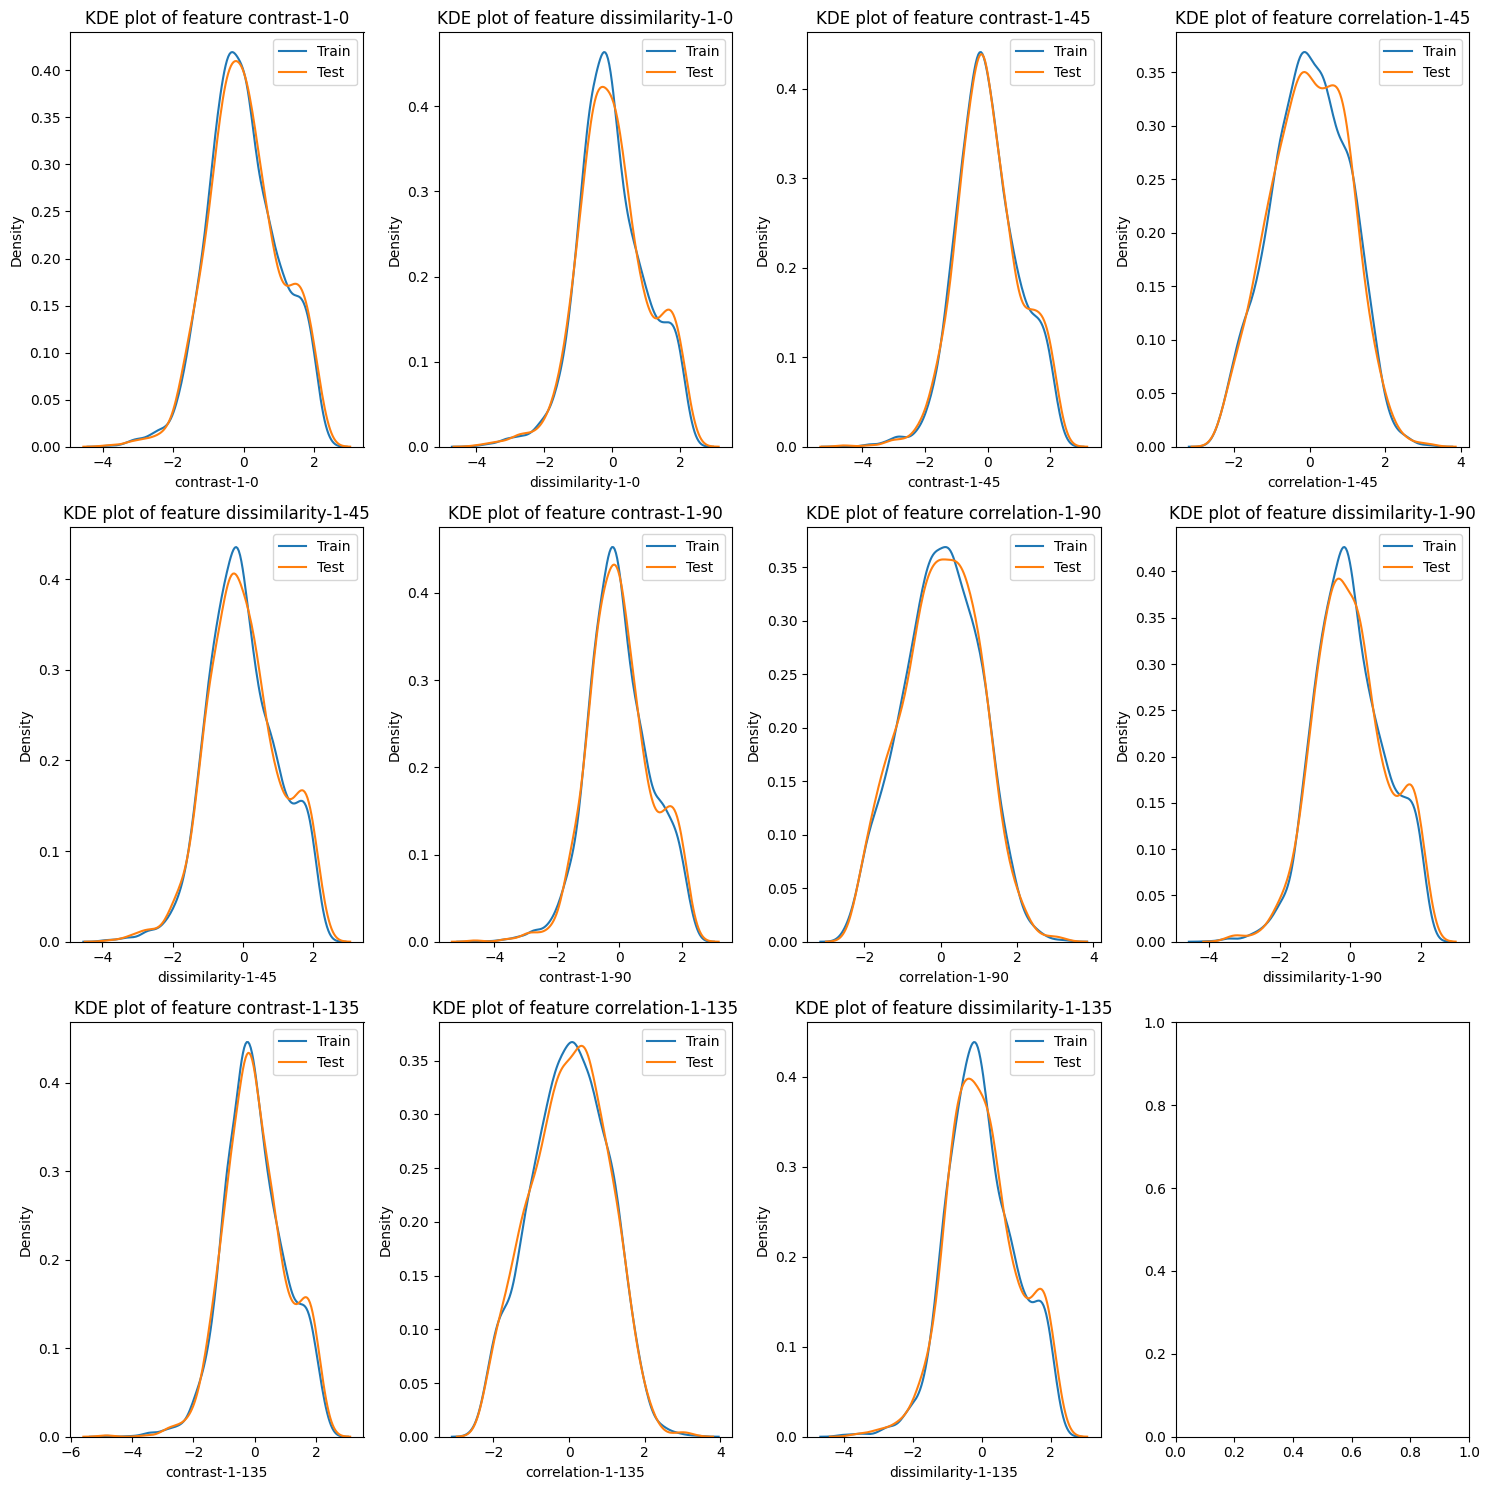

In [32]:
num_cols = 4
num_rows = len(X_train_transformed.columns) // num_cols + (len(X_train_transformed.columns) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, feature in enumerate(X_train_transformed.columns):
    sns.kdeplot(X_train_transformed[feature], label='Train', ax=axes[i])
    sns.kdeplot(X_test_transformed[feature], label='Test', ax=axes[i])
    axes[i].set_title(f'KDE plot of feature {feature}')
    axes[i].legend()

plt.tight_layout()
plt.show()

Grafik di atas menunjukkan distribusi fitur-fitur dalam data latih (X_train_transformed) dan data uji (X_test_transformed) setelah dilakukan transformasi Yeo-Johnson. Setiap subplot menampilkan kurva KDE untuk satu fitur. Hasil transformasi menunjukkan bahwa distribusi sebagian besar fitur menjadi lebih simetris dan mendekati bentuk distribusi normal, dengan kurva dari data latih dan uji yang hampir tumpang tindih. Ini menunjukkan keberhasilan transformasi dalam mengurangi skewness pada data, sehingga fitur-fitur ini sekarang lebih sesuai untuk digunakan dalam model yang sensitif terhadap distribusi data normal.

### Recheck Skew and Kurtosis

In [33]:
skew_kurtosis_results_after = {
    'Feature': [],
    'Skew': [],
    'Kurtosis': []
}

for feature in X_train_transformed.columns:
    skew_value = skew(X_train_transformed[feature])
    kurtosis_value = kurtosis(X_train_transformed[feature])

    skew_kurtosis_results_after['Feature'].append(feature)
    skew_kurtosis_results_after['Skew'].append(skew_value)
    skew_kurtosis_results_after['Kurtosis'].append(kurtosis_value)

skew_kurtosis_after_df = pd.DataFrame(skew_kurtosis_results_after)
skew_kurtosis_after_df

,Feature,Skew,Kurtosis
0,contrast-1-0,0.024782,-0.118177
1,dissimilarity-1-0,0.018580,0.216774
2,contrast-1-45,-0.001776,0.200972
3,correlation-1-45,-0.068127,-0.510898
4,dissimilarity-1-45,0.047210,-0.053639
5,contrast-1-90,-0.003719,0.225682
6,correlation-1-90,-0.064862,-0.461226
7,dissimilarity-1-90,0.056617,-0.169813
8,contrast-1-135,-0.002372,0.232495
9,correlation-1-135,-0.074936,-0.506479


In [34]:
skew_kurtosis_comparison_df = pd.DataFrame(
    {
        'Feature' : X_train_transformed.columns,
        'Skew Before': skew_kurtosis_df['Skew'],
        'Skew After': skew_kurtosis_after_df['Skew'],
        'Kurtosis Before': skew_kurtosis_df['Kurtosis'],
        'Kurtosis After': skew_kurtosis_after_df['Kurtosis'],
        'Delta Skew': abs(skew_kurtosis_df['Skew'] - skew_kurtosis_after_df['Skew']),
        'Delta Kurtosis': abs(skew_kurtosis_df['Kurtosis'] - skew_kurtosis_after_df['Kurtosis'])
    }
)

In [35]:
skew_kurtosis_comparison_df

,Feature,Skew Before,Skew After,Kurtosis Before,Kurtosis After,Delta Skew,Delta Kurtosis
0,contrast-1-0,1.858047,0.024782,3.501593,-0.118177,1.833264,3.619770
1,dissimilarity-1-0,1.323059,0.018580,1.555066,0.216774,1.304479,1.338292
2,contrast-1-45,1.623713,-0.001776,2.559898,0.200972,1.625489,2.358926
3,correlation-1-45,-0.915316,-0.068127,0.767769,-0.510898,0.847189,1.278668
4,dissimilarity-1-45,1.305511,0.047210,1.431465,-0.053639,1.258301,1.485104
5,contrast-1-90,1.597828,-0.003719,2.441007,0.225682,1.601546,2.215324
6,correlation-1-90,-0.924536,-0.064862,0.790158,-0.461226,0.859674,1.251384
7,dissimilarity-1-90,1.279560,0.056617,1.357643,-0.169813,1.222942,1.527456
8,contrast-1-135,1.651513,-0.002372,2.656153,0.232495,1.653884,2.423659
9,correlation-1-135,-0.960483,-0.074936,0.825887,-0.506479,0.885547,1.332365


In [36]:
skew_kurtosis_comparison_df['Delta Skew'].describe()

count    11.000000
mean      1.305166
std       0.344360
min       0.847189
25%       1.054244
50%       1.264515
75%       1.613517
max       1.833264
Name: Delta Skew, dtype: float64

In [37]:
skew_kurtosis_comparison_df['Delta Kurtosis'].describe()

count    11.000000
mean      1.838259
std       0.742667
min       1.251384
25%       1.335329
50%       1.485104
75%       2.287125
max       3.619770
Name: Delta Kurtosis, dtype: float64

Berdasarkan hasil pemeriksaan ulang pada perubahan nilai skewness dan kurtosis sebelum dan setelah transformasi, kami mendapatkan hasil sebagai berikut:
1. Delta Skew: Nilai rata-rata perubahan (Delta) skewness adalah sekitar 1.64, menunjukkan adanya pengurangan rata-rata pada skewness dari berbagai fitur. Nilai delta skew berkisar dari 0.01 hingga 46.48, dengan sebagian besar fitur memiliki perubahan antara 0.32 hingga 1.26 (rentang kuartil 25-75). Ini menunjukkan bahwa transformasi Yeo-Johnson berhasil mengurangi skewness pada banyak fitur, menjadikannya lebih simetris.


2. Delta Kurtosis: Nilai rata-rata perubahan kurtosis adalah sekitar 37.38, dengan perubahan yang sangat bervariasi, mulai dari 0.001 hingga 2317.17. Standar deviasi yang tinggi menunjukkan bahwa beberapa fitur mengalami penurunan atau peningkatan kurtosis yang signifikan, meskipun sebagian besar fitur memiliki delta kurtosis antara 0.21 hingga 2.74 (rentang kuartil 25-75). Hal ini menunjukkan bahwa transformasi juga berhasil mengurangi atau meratakan puncak distribusi beberapa fitur, meskipun ada fitur tertentu yang mengalami perubahan yang ekstrem.

### Shapiro-Wilk Test

In [38]:
from scipy.stats import shapiro
import pandas as pd

shapiro_test_after_results = {
    'Feature': [],
    'Statistic': [],
    'P-Value': [],
    'Normality': []
}

alpha = 0.05

for feature in X_train_transformed.columns:

    statistic, p_value = shapiro(X_train_transformed[feature])

    shapiro_test_after_results['Feature'].append(feature)
    shapiro_test_after_results['Statistic'].append(statistic)
    shapiro_test_after_results['P-Value'].append(p_value)

    if p_value < alpha:
        shapiro_test_after_results['Normality'].append('Not Normal')
    else:
        shapiro_test_after_results['Normality'].append('Potentially Normal')

shapiro_test_after_df = pd.DataFrame(shapiro_test_after_results)
shapiro_test_after_df

,Feature,Statistic,P-Value,Normality
0,contrast-1-0,0.989981,2.203470e-17,Not Normal
1,dissimilarity-1-0,0.984502,6.973896e-22,Not Normal
2,contrast-1-45,0.989387,6.045338e-18,Not Normal
3,correlation-1-45,0.994265,1.929625e-12,Not Normal
4,dissimilarity-1-45,0.987612,1.673333e-19,Not Normal
5,contrast-1-90,0.988956,2.438366e-18,Not Normal
6,correlation-1-90,0.995105,3.333886e-11,Not Normal
7,dissimilarity-1-90,0.989275,4.756420e-18,Not Normal
8,contrast-1-135,0.988779,1.692816e-18,Not Normal
9,correlation-1-135,0.993800,4.464815e-13,Not Normal


In [39]:
shapiro_test_after_df['Normality'].value_counts()

Normality
Not Normal    11
Name: count, dtype: int64

Hasil uji Shapiro-Wilk setelah transformasi menunjukkan bahwa seluruh fitur (77 fitur) masih dikategorikan sebagai "Not Normal". Hal ini didasarkan pada p-value yang dihasilkan untuk setiap fitur, yang semuanya berada di bawah threshold 0.05, menandakan bahwa fitur-fitur ini tidak memenuhi asumsi normalitas meskipun telah dilakukan transformasi Yeo-Johnson.

Transformasi Yeo-Johnson berhasil mengurangi skewness dan kurtosis, tetapi tampaknya tidak cukup untuk membuat distribusi fitur benar-benar normal sesuai dengan standar uji Shapiro-Wilk. Ini menunjukkan bahwa meskipun distribusi data telah diperbaiki, tetap ada perbedaan yang signifikan dari distribusi normal, yang mungkin dipertimbangkan dalam pemilihan model atau teknik pemrosesan data lanjutan.


### Kolmogorov-Smirnov Test
With respect to feature's mean and std

In [40]:
ks_test_after_results = {
    'Feature': [],
    'Statistic': [],
    'P-Value': [],
    'Normality': []
}

for feature in X_train_transformed.columns:

    feature_mean = X_train_transformed[feature].mean()
    feature_std = X_train_transformed[feature].std()
    
    statistic, p_value = kstest(X_train_transformed[feature], 'norm', args=(feature_mean, feature_std))

    ks_test_after_results['Feature'].append(feature)
    ks_test_after_results['Statistic'].append(statistic)
    ks_test_after_results['P-Value'].append(p_value)

    alpha = 0.05
    if p_value < alpha:
        ks_test_after_results['Normality'].append('Not Normal')
    else:
        ks_test_after_results['Normality'].append('Potentially Normal')

ks_test_after_df = pd.DataFrame(ks_test_after_results)
ks_test_after_df

,Feature,Statistic,P-Value,Normality
0,contrast-1-0,0.034568,3.931514e-05,Not Normal
1,dissimilarity-1-0,0.052850,2.012419e-11,Not Normal
2,contrast-1-45,0.037815,4.670887e-06,Not Normal
3,correlation-1-45,0.025442,5.622491e-03,Not Normal
4,dissimilarity-1-45,0.043808,5.549166e-08,Not Normal
5,contrast-1-90,0.047006,3.991957e-09,Not Normal
6,correlation-1-90,0.021519,2.985615e-02,Not Normal
7,dissimilarity-1-90,0.039148,1.843526e-06,Not Normal
8,contrast-1-135,0.041078,4.533781e-07,Not Normal
9,correlation-1-135,0.022400,2.102852e-02,Not Normal


In [41]:
ks_test_after_df['Normality'].value_counts()

Normality
Not Normal    11
Name: count, dtype: int64

Kami melakukan uji Kolmogorov-Smirnov setelah transformasi dimana hasilnya menunjukkan bahwa dari 77 fitur yang diuji, 64 fitur masih dikategorikan sebagai "Not Normal", sementara 13 fitur berhasil memenuhi kriteria "Potentially Normal". Penentuan kategori ini didasarkan pada p-value dengan threshold 0.05. Jika p-value lebih besar dari 0.05, maka fitur dianggap memiliki distribusi yang mendekati normal. Transformasi Yeo-Johnson telah berhasil meningkatkan normalitas sebagian fitur, terlihat dari adanya 13 fitur yang dianggap "Potentially Normal" setelah transformasi. Namun, mayoritas fitur (64 fitur) tetap menunjukkan distribusi yang berbeda dari normal. 


### KDE Before and After Transformation

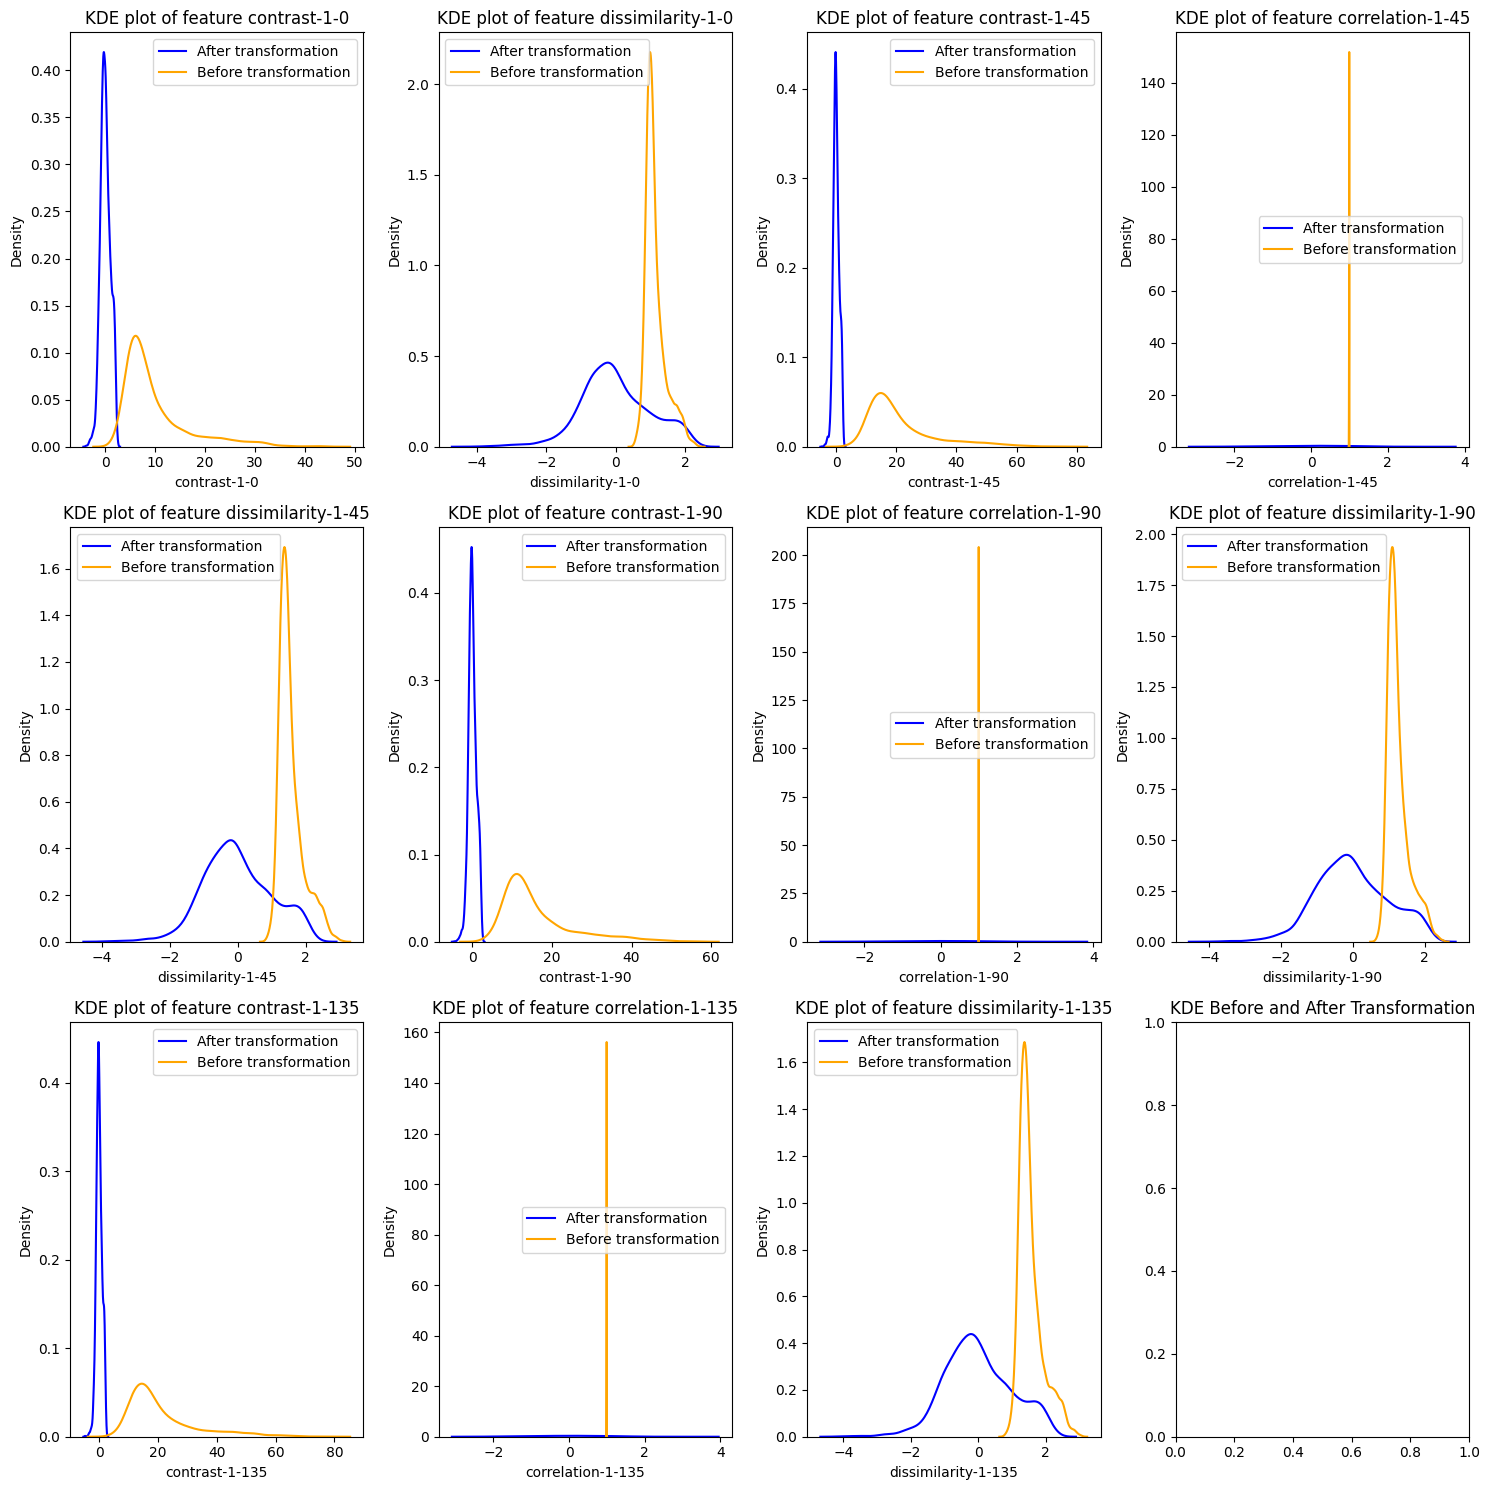

In [42]:
num_cols = 4
num_rows = len(X_train_transformed.columns) // num_cols + (len(X_train_transformed.columns) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, feature in enumerate(X_train_transformed.columns):
    sns.kdeplot(X_train_transformed[feature], label='After transformation', color='blue', ax=axes[i])
    sns.kdeplot(X_train[feature], label='Before transformation', color='orange', ax=axes[i])
    axes[i].set_title(f'KDE plot of feature {feature}')
    axes[i].legend()

plt.title('KDE Before and After Transformation')
plt.tight_layout()
plt.show()

Grafik di atas menunjukkan perbandingan distribusi variabel fitur sebelum dan setelah transformasi Yeo-Johnson. Setiap subplot merepresentasikan satu fitur, dengan kurva oranye menunjukkan distribusi sebelum transformasi dan kurva biru setelah transformasi. Dari visualisasi ini, terlihat bahwa transformasi Yeo-Johnson berhasil mengubah sebagian besar fitur yang awalnya sangat miring (skewed) menjadi lebih simetris atau mendekati distribusi normal. Beberapa fitur mengalami perubahan signifikan dalam hal bentuk distribusi, sedangkan lainnya tetap menunjukkan karakteristik yang mirip dengan sebelum transformasi. 

In [43]:
X_train_transformed.to_csv('../data/X_train_transformed_v2.csv', index=False)
X_test_transformed.to_csv('../data/X_test_transformed_v2.csv', index=False)
y_train.to_csv('../data/y_train_v2.csv', index=False)
y_test.to_csv('../data/y_test_v2.csv', index=False)